In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
import re
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from statistics import mode

def toSentence(list_words): # Convert list of words into sentence
        sentence = ' '.join(word for word in list_words)
        return sentence

data = pd.read_csv("labelled2.csv")
X = data['text_preprocessed'].apply(toSentence) 
max_features = 5000 
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
polarity_encode = {0 : -1, 1 : 1}
y = data['sentiment'].map(polarity_encode)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf10 = CatBoostClassifier(random_state=42)
param10 = {}
param10['depth'] = [4,5,6,7,8,9, 10]
param10['learning_rate'] = [0.01,0.02,0.03,0.04]
param10['iterations'] = [10, 20,30,40,50,60,70,80,90, 100]

params = [param10]
gs = GridSearchCV(clf10, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs.best_params_

0:	learn: 0.6908894	total: 192ms	remaining: 3.65s
1:	learn: 0.6880775	total: 242ms	remaining: 2.18s
2:	learn: 0.6855514	total: 295ms	remaining: 1.67s
3:	learn: 0.6827906	total: 350ms	remaining: 1.4s
4:	learn: 0.6808892	total: 407ms	remaining: 1.22s
5:	learn: 0.6779216	total: 472ms	remaining: 1.1s
6:	learn: 0.6740301	total: 531ms	remaining: 986ms
7:	learn: 0.6716499	total: 594ms	remaining: 891ms
8:	learn: 0.6691739	total: 664ms	remaining: 811ms
9:	learn: 0.6649133	total: 727ms	remaining: 727ms
10:	learn: 0.6613765	total: 789ms	remaining: 645ms
11:	learn: 0.6598541	total: 850ms	remaining: 567ms
12:	learn: 0.6579997	total: 911ms	remaining: 491ms
13:	learn: 0.6525220	total: 978ms	remaining: 419ms
14:	learn: 0.6496635	total: 1.04s	remaining: 347ms
15:	learn: 0.6469967	total: 1.1s	remaining: 276ms
16:	learn: 0.6437162	total: 1.18s	remaining: 207ms
17:	learn: 0.6409207	total: 1.25s	remaining: 138ms
18:	learn: 0.6384474	total: 1.31s	remaining: 69.1ms
19:	learn: 0.6365028	total: 1.38s	remaining

{'depth': 10, 'iterations': 20, 'learning_rate': 0.02}

In [2]:
predictions = gs.predict(X_test)

if mode(predictions) == -1:
    hasil_prediksi = "Username is Negative"
elif mode(predictions) == 1:
    hasil_prediksi = "Username is Positive"

print("Prediksi : ",predictions)
print("Hasil Prediksi: ",hasil_prediksi)

Prediksi :  [-1  1  1 -1 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1  1
  1 -1 -1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1  1  1 -1
  1 -1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1  1  1 -1
 -1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1
  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1
  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1
  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1  1
 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1
 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1

In [3]:
print("Test Accuracy Score:",accuracy_score(gs.predict(X_test), y_test))
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Test Accuracy Score: 0.6336760925449871
Test Precision: 0.612987012987013
Test Recall: 0.6344086021505376
Test ROC AUC Score: 0.6337067641294559


In [4]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.63      0.65      0.64       393
           1       0.63      0.61      0.62       385

    accuracy                           0.63       778
   macro avg       0.63      0.63      0.63       778
weighted avg       0.63      0.63      0.63       778



Text(0.5, 1.0, 'Confusion Matrix')

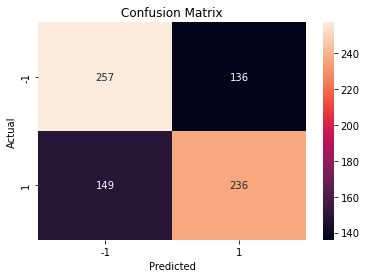

In [5]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, 
    xticklabels=[-1,1], 
    yticklabels=[-1,1],
    fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")